#### Spotify Song Data Analysis 
 Thursday, December 14th
Jack Krebsbach & Eli Edwards

#### Import all libraries needed for analysis

We will use various models to predict song popularity and classify which playlist genre a song came from.

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Data Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>playlist_genre</td>
<td>character</td>
<td style="font-size: 7px; max-width: 400px;">Playlist genre</td>
</tr>
<tr>
<td>playlist_subgenre</td>
<td>character</td>
<td style="font-size: 7px; max-width: 400px;">Playlist subgenre</td>
</tr>
<tr>
<td>danceability</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
</tr>
<tr>
<td>energy</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
</tr>
<tr>
<td>key</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g., 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.</td>
</tr>
<tr>
<td>loudness</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB.</td>
</tr>
<tr>
<td>mode</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
</tr>
<tr>
<td>speechiness</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
</tr>
<tr>
<td>acousticness</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
</tr>
<tr>
<td>instrumentalness</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
</tr>
<tr>
<td>liveness</td>
<td>double</td>
<td style="font-size: 7px; max-width: 400px;">Detects the presence of an audience in


#### Imports

Generally we will use ```sklearn``` for model building. We will use ```pandas``` to read in the data.

In [2]:
# Imports for analysis
import pandas as pd
import itertools
import xgboost as xgb
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from ISLP import confusion_table
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestRegressor as RF, RandomForestClassifier as RFC, GradientBoostingRegressor as GBR)
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.tree import ( DecisionTreeRegressor as DTR, plot_tree)
from sklearn.metrics import (accuracy_score,r2_score)

#### Import Data

In [144]:
# Read in the CSV
df = pd.read_csv("./clean_data/spotify_songs.csv")

# Transform categorical data
df['playlist_genre'] = df['playlist_genre'].astype('category')
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')

scaler = StandardScaler()
# Standardize numerical data
numeric_cols = df.select_dtypes(include=['number'])
df[numeric_cols.columns] = numeric_cols.astype('float64')
df[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

In [145]:
# Look at first few columns
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.941531,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,1.367123,1,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,0.981557,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,0.585766,1,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1.101635,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,1.100090,0,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.701374,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,0.984309,1,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,1.061609,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.685151,1,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172


### Scatter plot of data

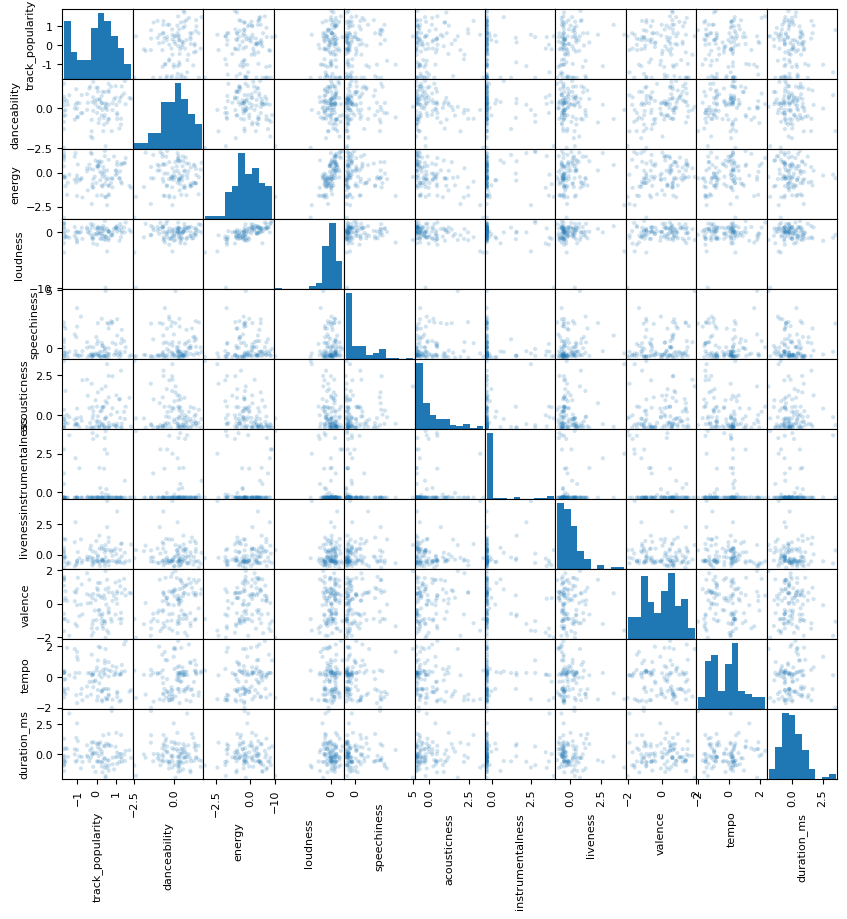

In [146]:
sampled_df = df[numeric_cols.columns].sample(n=100, random_state=42)

# Create a scatter matrix from the sampled data
axes = pd.plotting.scatter_matrix(sampled_df, alpha=0.2, figsize=(10, 10))

# Adjust label properties
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.xaxis.label.set_fontsize(8)
    ax.yaxis.label.set_fontsize(8)
# Display the plot
plt.show()

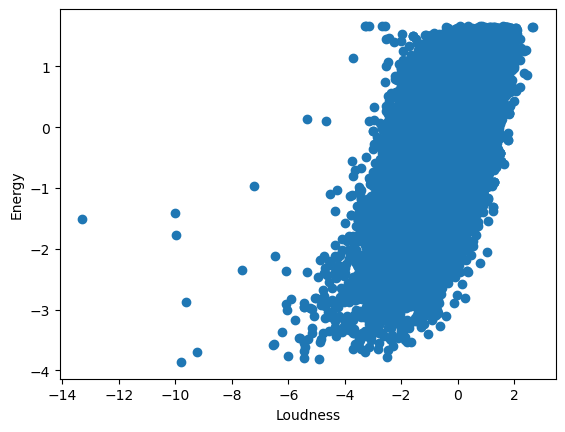

In [147]:
plt.scatter(df.loudness, df.energy)
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title = 'Loudness vs Energy'
plt.show()

#### Regression Analysis 
We start out by splitting our data in training and test sets

In [148]:
(train, test) = skm.train_test_split(df,
                                test_size=0.3,
                                random_state=0)

In [149]:
# Predictors
cols = [ 'danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'duration_ms' ]


##### Simple Linear Regression

We fit a linear model using our training data. While the coefficients appear to be significant (aside from key and mode), the R squared value is 0.072, indicating that our variables don't show much correlation. When testing the model on our test set, its mean squared error values close to 1 - which implies poor prediction because our data was scaled. Looking at a graph of the residuals vs fitted values, the data appears to be resting on a slanted slope. This is irregular and likely means that our selected variables aren't explaining enough.


In [150]:
# Training
x_train = train[cols]
popularity_train = train.track_popularity
# Testing
x_test = test[cols]
popularity_test = test.track_popularity

In [151]:
reg = sm.OLS(popularity_train, x_train)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       track_popularity   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):              0.072
Method:                 Least Squares   F-statistic:                              148.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:18:18   Log-Likelihood:                         -31785.
No. Observations:               22983   AIC:                                  6.359e+04
Df Residuals:                   22971   BIC:                                  6.369e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         0.0309      0.007      4.232      0.000       0.017       0.045
energy              -0.2025      0.010    -19.534      0.000      -0.223      -0.182
key                 -0.0013      0.001     -1.101      0.271      -0.004       0.001
loudness             0.1804      0.009     19.577      0.000       0.162       0.198
mode                 0.0167      0.010      1.626      0.104      -0.003       0.037
speechiness         -0.0337      0.007     -5.128      0.000      -0.047      -0.021
acousticness         0.0411      0.008      5.336      0.000       0.026       0.056
instrumentalness    -0.1061      0.007    -15.690      0.000      -0.119      -0.093
liveness            -0.0235      0.007     -3.601      0.000      -0.036      -0.011
valence              0.0212      0.007      2.969      0.003       0.007       0.035
tempo                0.0273      0.007      4.150      0.000       0.014       0.040
duration_ms         -0.1135      0.007    -17.434      0.000      -0.126      -0.101
==============================================================================
Omnibus:                     2726.957   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1002.332
Skew:                          -0.288   Prob(JB):                    2.22e-218
Kurtosis:                       2.155   Cond. No.                         13.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

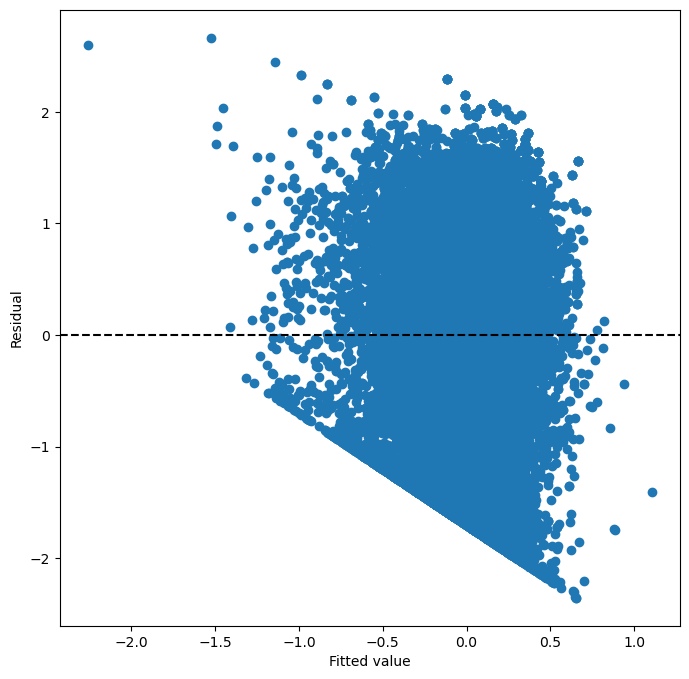

In [152]:
# Plotting residuals vs fitted values
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

##### Regression Tree Analysis

We then fit our data to a regression tree model. We pruned the tree to find the optimal model, which unfortunately did not do a very good job at predicting the data. We fit the data to the test set, and got an even lower R squared value than before. The mean squared error was again close to 1. Getting the importance values, instrumentalness and duration seem to have the most impact on our results, even though they are not very significant.

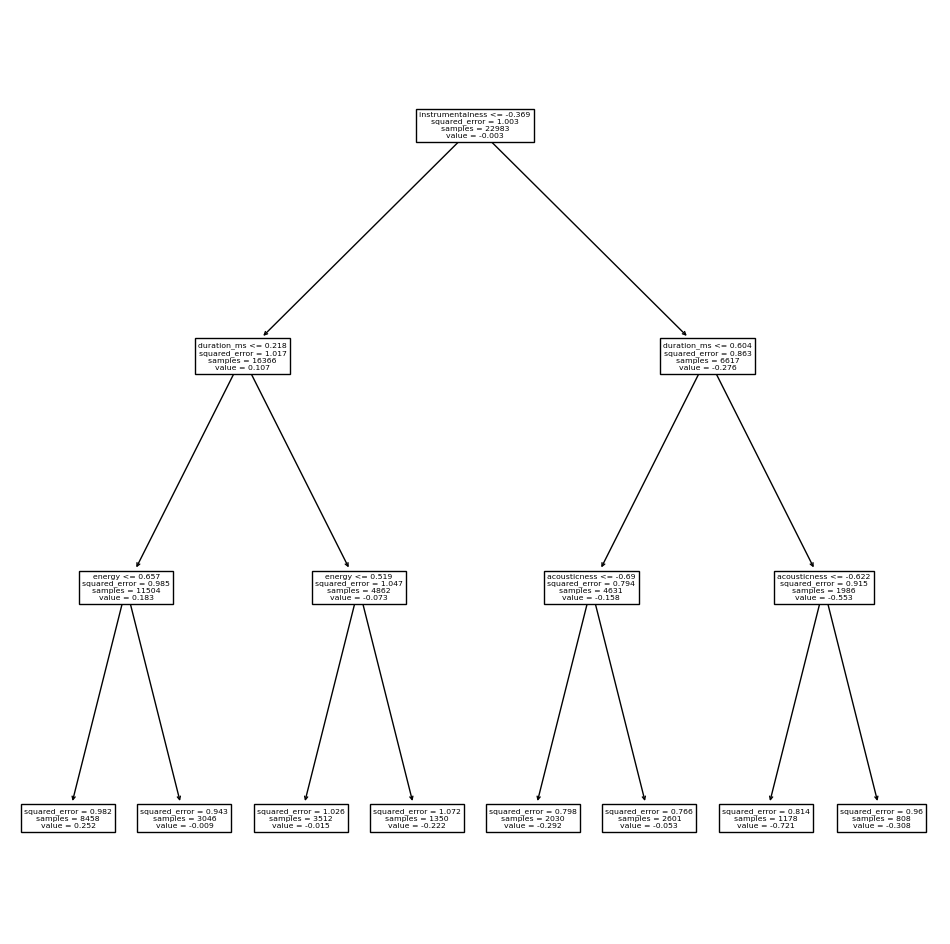

In [153]:
# Creating initial tree
reg = DTR(max_depth=3)
reg.fit(x_train, popularity_train)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg, feature_names=reg.feature_names_in_, ax=ax);

In [154]:
# 'Pruning' the tree
ccp_path = reg.cost_complexity_pruning_path(x_train, popularity_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(x_train, popularity_train)

In [155]:
# Fitting our test data
best_ = grid.best_estimator_
predicted = best_.predict(x_test)

# MSE
print(np.mean((popularity_test - best_.predict(x_test))**2))

# R squared
r2_score(popularity_test, predicted) 

0.9443524899017082


0.049260738158203754

In [156]:
# Importance values of each predictor
print(best_.feature_importances_)
best_.feature_names_in_

[0.         0.13169085 0.         0.         0.         0.
 0.09989581 0.46945227 0.         0.         0.         0.29896106]


array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'], dtype=object)

#### Classification Analysis

Now we will explore classifying the playlist genre these songs came from.

Overall, the XGBoost classifier had the highest accuracy on the test set. We use k-fold cross validation with 5 folds over a grid of parameters. 

XGBoost model 
- Max Depth: 5
- Number of estimators: 300 
- Learning rate: 0.1
- Test set accuracy: 57.4% 

Speechiness was the highest importance


### Plot first two principal components of data

To get to know the data first we plot the first two principal components.

Generally the data are scattered across classes. EDM seems to be the most clustered class when plotted on the first two principal components.


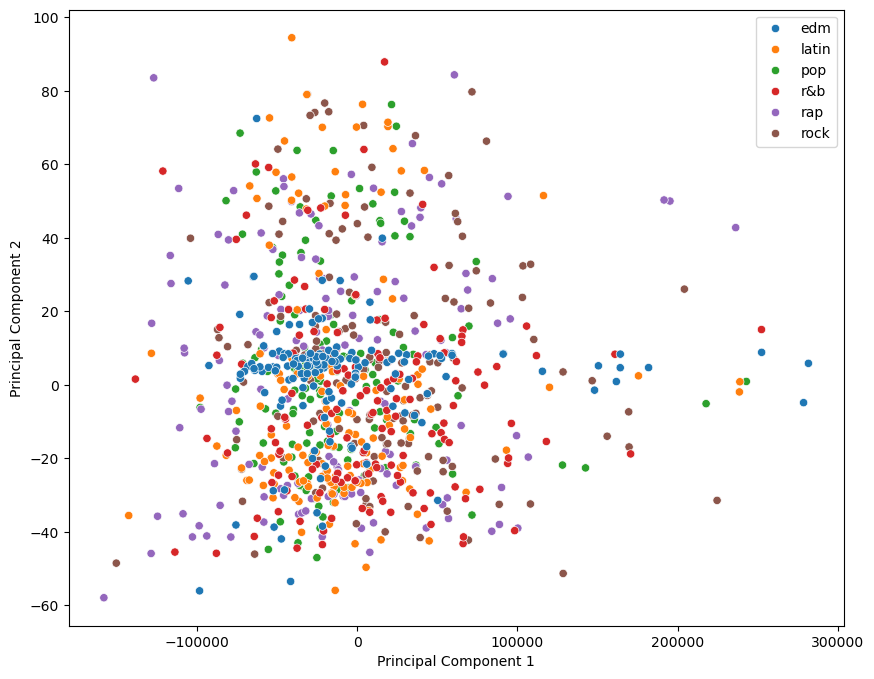

In [157]:
# Get the first two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_cols)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['playlist_genre'] = df['playlist_genre'].values  # Ensure this column aligns with your PCA data

# Sample 150 points from each class for plotting
plot_df = pd.DataFrame()
for genre in pca_df['playlist_genre'].unique():
    sampled_genre_df = pca_df[pca_df['playlist_genre'] == genre].sample(n=150, random_state=42)
    plot_df = pd.concat([plot_df, sampled_genre_df], axis=0)

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='playlist_genre', data=plot_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Create train/test split

Because we have so many observations we can afford to only use 10% of the data on testing. We stratify the data be playlist genre to ensure that all classes are included an equal amount in the training and testing data.

In [158]:
(train, test) = skm.train_test_split(df, test_size=0.10, random_state=0, stratify=df.playlist_genre)

### Make model matrix for classification

In [159]:
# Predictors
cols = ['track_popularity',
        'danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'duration_ms']

In [160]:
# Training
x_train = train[cols]
genre_train = train.playlist_genre

In [161]:
# Testing
x_test = test[cols]
genre_test = test.playlist_genre

### K-Nearest Neighbors

For a baseline, we try and fit a K-Nearest-Neighbors model.

In [162]:
# Use approximately the square root of number of observations
#k = int(np.floor(np.sqrt(x_train.shape[0])))
k = 20
print(f'Using {k} neighbors')
# Initialize classifier
knn = KNeighborsClassifier(n_neighbors=k) 
# Fit the model
knn.fit(x_train, genre_train)
# Predict on the testing set
knn_pred = knn.predict(x_test)
# Get confusion table
confusion_table(knn_pred, genre_test)

Using 20 neighbors


Truth,edm,latin,pop,r&b,rap,rock
Predicted,,,,,,
edm,423,60,118,36,64,70
latin,32,217,75,69,70,15
pop,84,87,193,69,40,69
r&b,18,63,74,225,73,63
rap,20,65,29,101,303,7
rock,27,24,62,43,25,271


In [163]:
# Get confusion matrix
np.mean(knn_pred == genre_test)
accuracy_score(genre_test, knn_pred)

0.49695493300852617

##### Tune KNN Model

We will tune the KNN to find the optimal K from 1 to $\lfloor \sqrt{n} \rfloor + 1$ where $n$ is the number of observations in the test set.

<Figure size 640x480 with 0 Axes>

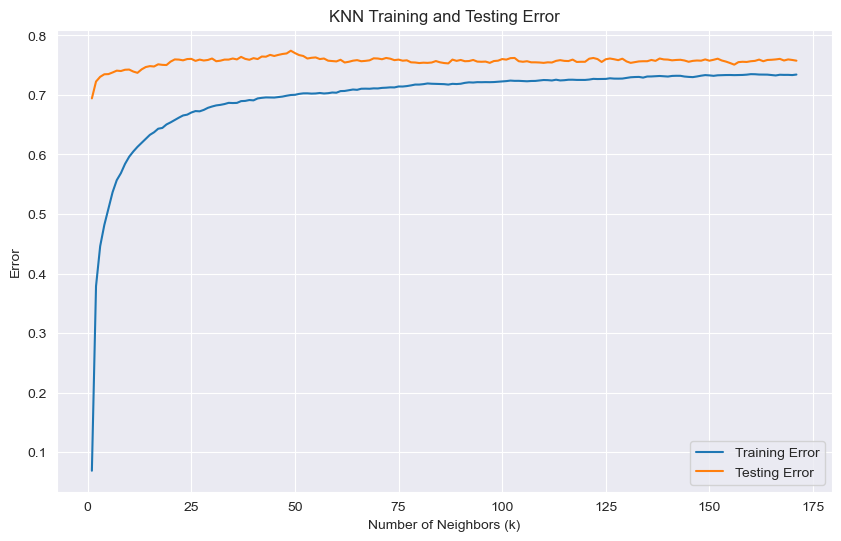

In [11]:
# Clear plot
plt.clf()
# Range of k to try
k_range = range(1, int(np.floor(np.sqrt(x_train.shape[0]))) + 1)

# Lists to store accuracies
train_error = []
test_error = []
# Loop over different values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, genre_train)

    # Training accuracy
    train_pred = knn.predict(x_train)
    train_error.append(1- accuracy_score(genre_train, train_pred))

    # Testing accuracy
    test_pred = knn.predict(x_test)
    test_error.append(1- accuracy_score(genre_test, test_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_error, label='Training Error')
plt.plot(k_range, test_error, label='Testing Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('KNN Training and Testing Error')
plt.legend()
plt.show()

It looks like the best that the KNN classifier can do is around $25\%$.

#### LDA Classifier

Now we fit a linear discriminant classifier to classify the song genres. There are no hyper parameters to tune.

In [67]:
# Instantiate the LDA model
lda = LinearDiscriminantAnalysis()
# Fit the model
lda.fit(x_train, genre_train)
# Predict on new data
lda_pred = lda.predict(x_test)
# Confusion matrix
cm = confusion_matrix(genre_test, lda_pred)

Class Accuracies: [0.55156951 0.37452471 0.36051502 0.44329897 0.50592217 0.54844607]


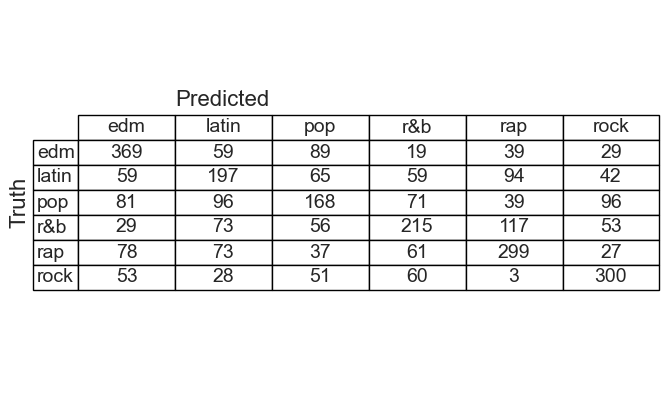

In [90]:
# Get genre labels
genre_labels = genre_test.cat.categories.tolist()

# Coerce into data frame
cm_df = pd.DataFrame(cm, index=genre_labels, columns=genre_labels)
# Plot the DataFrame using matplotlib
fig, ax = plt.subplots(figsize=(5, 5))  # Set figure size
ax.axis('off')

tbl = ax.table(cellText=cm_df.values, colLabels=cm_df.columns, rowLabels=cm_df.index, loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 1.5)

# Add labels for True Label and Predicted Label in the appropriate position
ax.text(-0.40, 0.5, 'Truth', va='center', ha='center', rotation='vertical', size=16, transform=ax.transAxes)
ax.text(0, 0.75, 'Predicted',size=16)
print(f'Class Accuracies: {np.diag(cm / np.sum(cm, axis=0))}')
#print(f'Normalized Accuracies: {cm / np.sum(cm, axis=0)}')

In [91]:
# Testing Accuracy
accuracy_score(genre_test, lda_pred)

0.4713763702801462

#### Plot the decision boundary for PCA Data

Using the first two principal components we fit the data and plot the decision boundaries.

In [35]:
# First fit another scaled PCA and predict probabilities
scaler = StandardScaler()
# Fit the scaler to the PCA components and transform the data
# Might have already been done, so we catch the error
try: 
    pca_df = pca_df.drop('playlist_genre', axis=1)
except Exception as e:
    print()

pca_df[['PC1', 'PC2']] = scaler.fit_transform(pca_df[['PC1', 'PC2']])

# Instantiate the LDA model for PCA version
lda_pca = LinearDiscriminantAnalysis()

# Fit the model
lda_pca.fit(pca_df[['PC1', 'PC2']], df.playlist_genre)

x_min, x_max = pca_df['PC1'].min() -1 , pca_df['PC1'].max() +1
y_min, y_max = pca_df['PC2'].min() -1 , pca_df['PC2'].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Create mesh
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['PC1','PC2'] )
# Predict the class using LDA for each point on the mesh
Z = lda_pca.predict_proba(mesh_points)

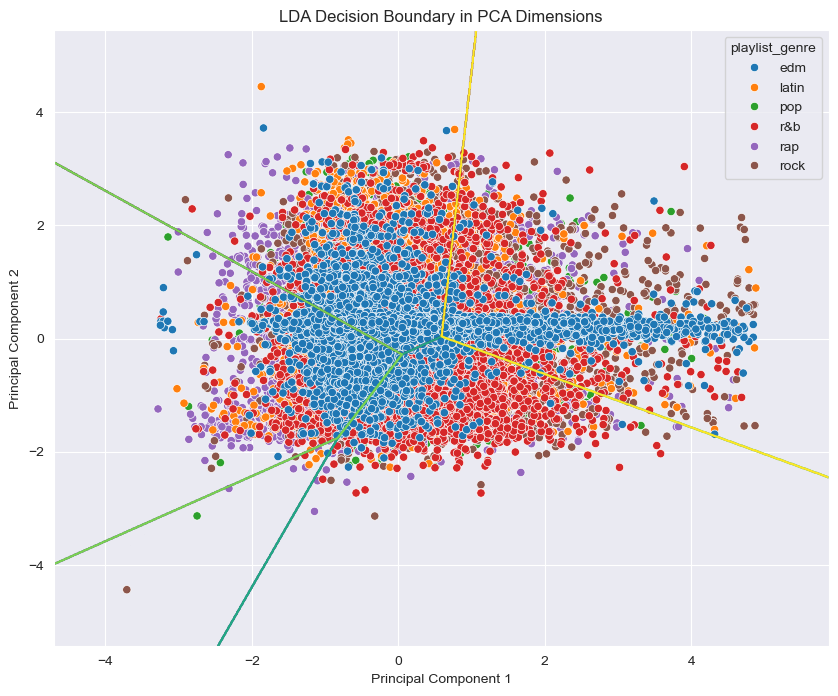

In [94]:
# Plot the PCA-transformed points
plt.figure(figsize=(10, 8))

num_classes = 6
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

for i in range(num_classes):
    max_prob = np.max(Z, axis=1) == Z[:, i]
    contour = plt.contour(xx, yy, max_prob.reshape(xx.shape), colors=[colors[i]])
 
sns.scatterplot(x='PC1', y='PC2', hue=df.playlist_genre, data=pca_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('LDA Decision Boundary in PCA Dimensions')
plt.show()

#### Random Forest

We will use Random Forest to classify the songs. With K-fold cross validation we will tune the number of estimators, the max_features used at each split, the max depth of each tree, and the minimum samples in each leaf. We will use 5 folds over the grid.

In [164]:
# Instantiate classifier instance
rfc = RFC(random_state=0, n_estimators=500,  min_samples_leaf=10)
# Fit the data
rfc.fit(x_train, genre_train)
# Predict on new data
rfc_pred = rfc.predict(x_test)
# Confusion matrix
cm = confusion_matrix(genre_test, rfc_pred)
cm

array([[440,  30,  66,  16,  27,  25],
       [ 37, 208,  79,  62, 101,  29],
       [ 99,  68, 181,  70,  43,  90],
       [ 20,  45,  45, 281, 112,  40],
       [ 33,  37,  30,  49, 402,  24],
       [ 25,  10,  38,  51,   7, 364]])

In [ ]:
# Get the accuracy
np.mean(rfc_pred == genre_test)

0.5712545676004872

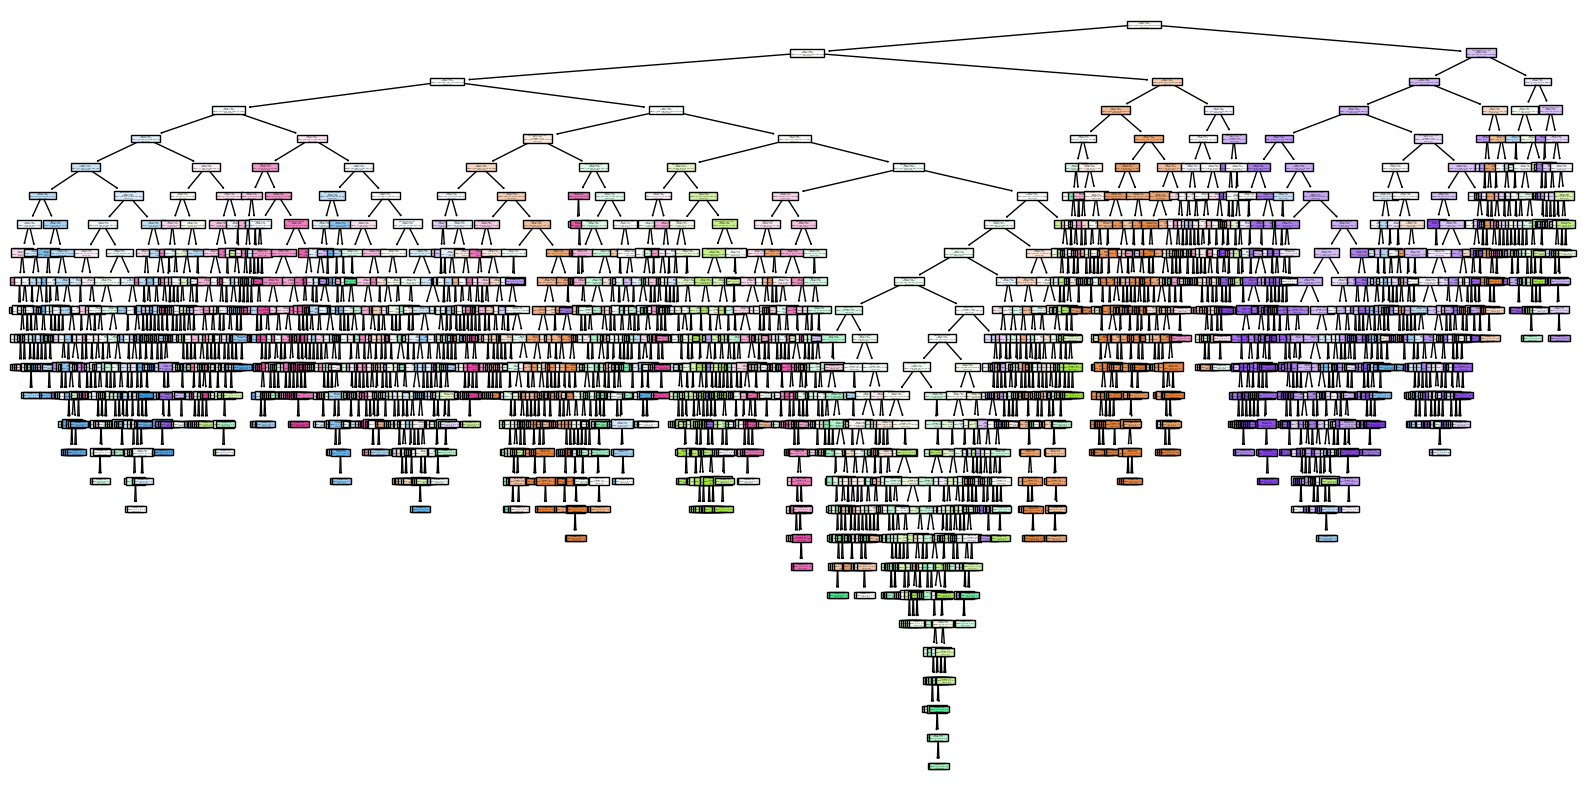

In [167]:
# Extract the first tree from the forest
first_tree = rfc.estimators_[0]

# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(first_tree, filled=True, feature_names=x_train.columns, class_names=True)
#plt.title("First Tree in the Random Forest")
plt.show()

##### Tune Parameters for Random Forest

In [ ]:
# Define Grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini',],
    'min_samples_leaf': [1, 2, 4, 10]
}

# param_grid = {
#     'n_estimators': [100,500],
#     'max_features': ['sqrt'],
#     'max_depth': [4],
#     'criterion': ['gini'],
#     'min_samples_leaf': [2]
# }

In [153]:
rfc = RFC(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(x_train, genre_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'n_estimators': [100, 200, 500]})

In [154]:
print("Best Parameters found by GridSearchCV:")
print(CV_rfc.best_params_)

Best Parameters found by GridSearchCV:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 500}


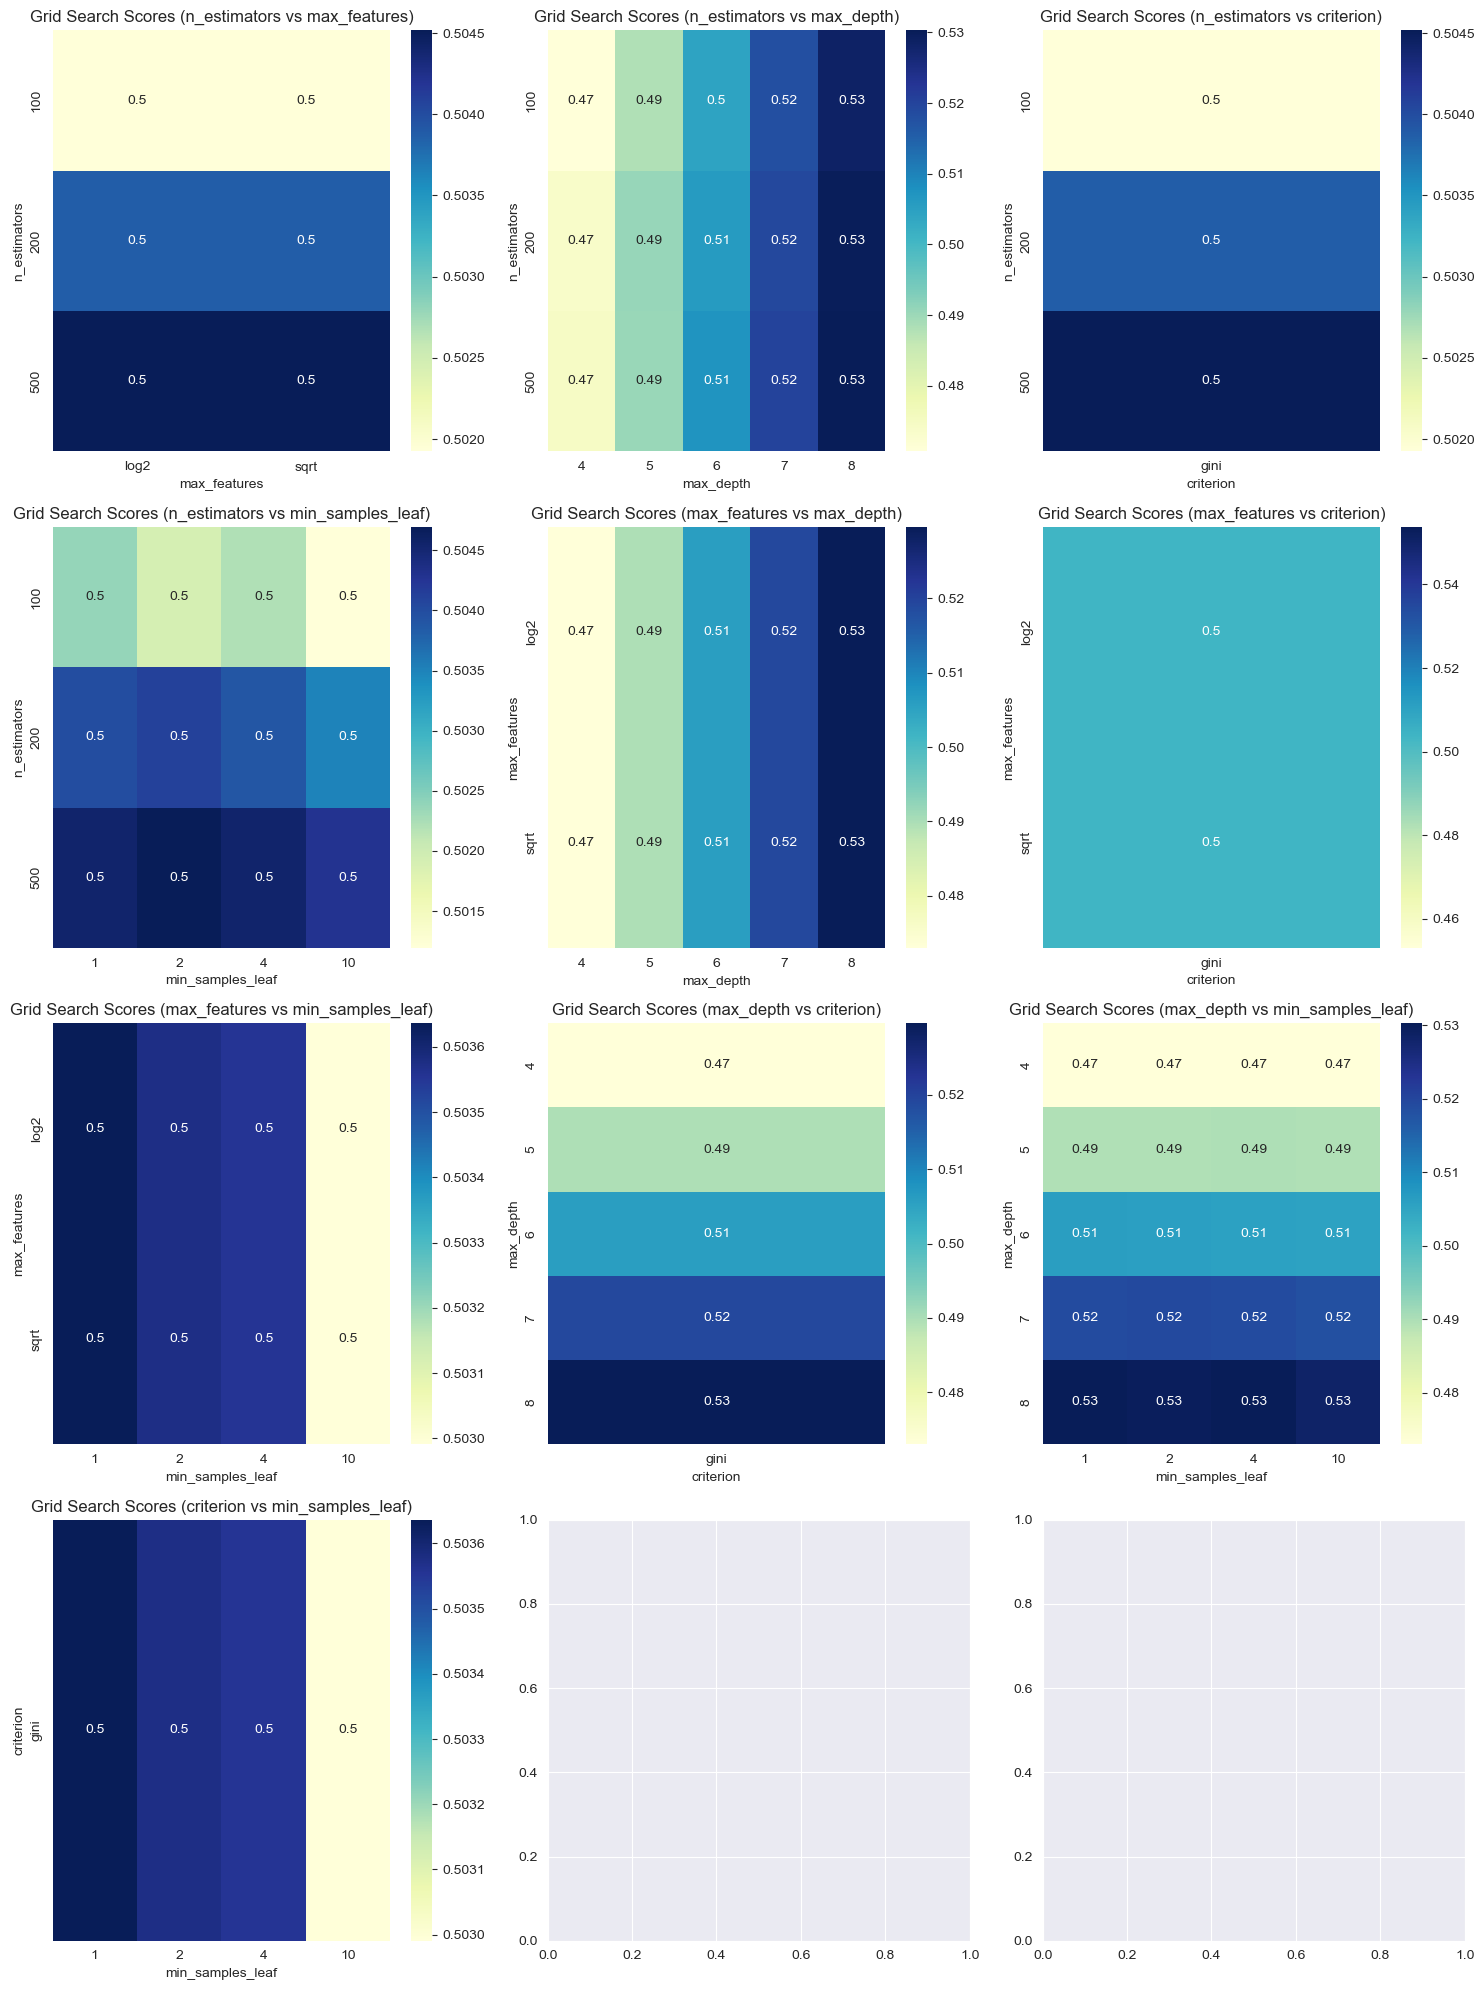

In [155]:
# Create plots for different hyperparameter values
param_pairs = list(itertools.combinations(param_grid.keys(), 2))
num_rows = len(param_pairs) // 3 + (len(param_pairs) % 3 > 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Loop over pairs of parameters
for idx, (param1, param2) in enumerate(param_pairs):
    results = pd.DataFrame(CV_rfc.cv_results_)

    # Aggregate the results
    grouped_results = results.groupby([f"param_{param1}", f"param_{param2}"]).mean(numeric_only=True)

    # Create a pivot table for each pair of parameters
    pivot_table = grouped_results["mean_test_score"].unstack()

    # Plotting in the specified subplot
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", ax=axs[idx])
    axs[idx].set_title(f"Grid Search Scores ({param1} vs {param2})")
    axs[idx].set_xlabel(param2)
    axs[idx].set_ylabel(param1)

# Adjust layout
plt.tight_layout()
plt.show()

In [156]:
rfc_best = CV_rfc.best_estimator_
rfc_pred = rfc_best.predict(x_test)
cm = confusion_matrix(genre_test, rfc_pred)
print(cm)

[[436  29  68  14  33  24]
 [ 46 198  59  70 110  33]
 [102  76 143  83  49  98]
 [ 23  50  39 261 130  40]
 [ 34  50  26  54 381  30]
 [ 31  14  31  63   8 348]]


In [157]:
accuracy_score(genre_test, rfc_pred)

0.5380633373934226

In [158]:
# Get feature importance for random forest
feature_importances = rfc_best.feature_importances_

# If x_train is a DataFrame, get the feature names
feature_names = x_train.columns

# Coerce to data frame
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print the top 3 features and their importances
print("Top 3 Feature Importances:")
print(importances_df.head(3))

Top 3 Feature Importances:
         Feature  Importance
6    speechiness    0.176049
1   danceability    0.153319
11         tempo    0.152939


#### XGBoost

To work with this classifier we first need to encode the data.

In [159]:
# Instantiate Label Encoder
pd.options.mode.chained_assignment = None
le_genre = LabelEncoder()
le_key = LabelEncoder()

# Encode testing set
y_encoded = le_genre.fit_transform(genre_train)
x_train.loc[:,'key'] = le_key.fit_transform(x_train.key)

# Encode training set
y_test_encoded = le_genre.transform(genre_test)
x_test.loc[:,'key'] = le_key.transform(x_test.key)

/var/folders/gf/bt25hkv172n_bttx0h72_6340000gn/T/ipykernel_71719/1143999346.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.loc[:,'key'] = le_key.fit_transform(x_train.key)
/var/folders/gf/bt25hkv172n_bttx0h72_6340000gn/T/ipykernel_71719/1143999346.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_test.loc[:,'key'] = le_key.transform(x_test.key)


In [160]:
# Instantiate the classifier
xg = xgb.XGBClassifier(enable_categorical = True)
# Fit the data
xg.fit(x_train, y_encoded) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [161]:
# Make prediction
xgb_pred = xg.predict(x_test)
#Confusion Matrx
cm = confusion_matrix(y_test_encoded, xgb_pred)
cm

array([[427,  31,  78,  19,  30,  19],
       [ 32, 219,  90,  70,  81,  24],
       [ 95,  58, 220,  74,  35,  69],
       [ 18,  58,  65, 261, 100,  41],
       [ 26,  44,  27,  65, 388,  25],
       [ 16,   8,  64,  43,   5, 359]])

In [162]:
# Get accuracy
np.mean(xgb_pred == y_test_encoded)

0.5706455542021924

#### Now do a grid search in KV-fold cross validation 

To find the optimal parameters we conduct a grid search with 5 folds along various values for ```max_depth```, ```n_estimators```, and ```learning_rate```.

In [163]:
# Define the parameter grid
param_grid = {
    'max_depth': [2,3,4, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1]
}

# param_grid = {
#     'max_depth': [3,2],
#     'n_estimators': [100],
#     'learning_rate': [0.2]
# }

In [164]:
# Instantiate an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=0,enable_categorical=True, use_label_encoder=False, eval_metric='mlogloss')
# Create GridSearchCV object
CV_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
# Fit GridSearchCV
CV_xgb.fit(x_train, y_encoded)
# The best estimator after grid search
best_xgb_model = CV_xgb.best_estimator_

#### Plot Grid Search of Best Params

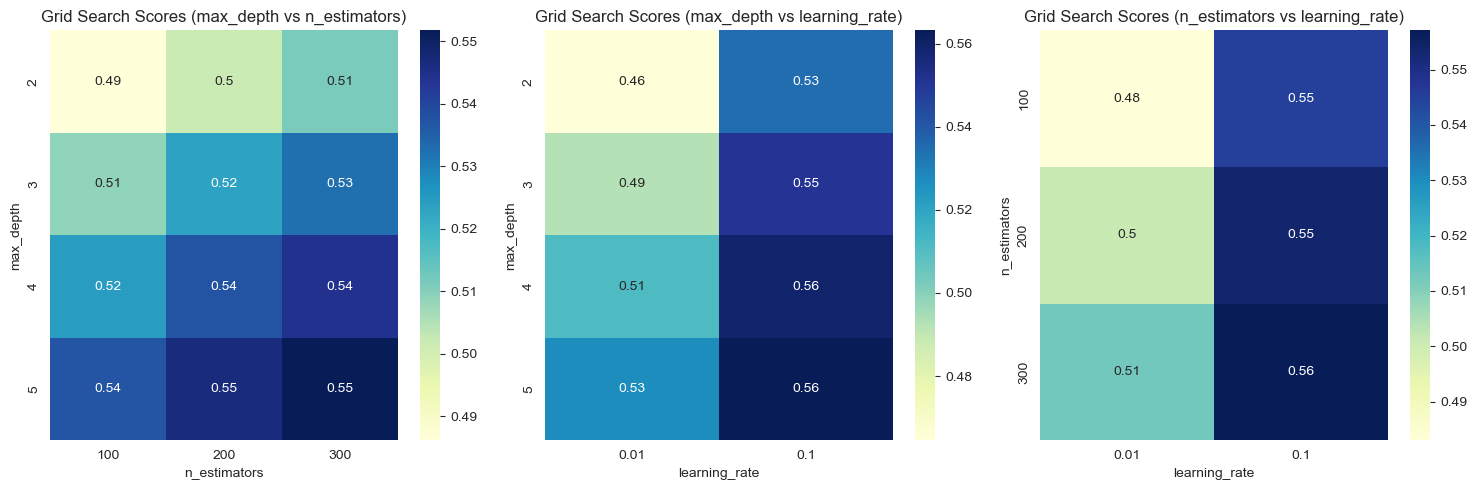

In [165]:
# Assuming 'param_grid' and 'CV_xgb.cv_results_' are defined
param_pairs = list(itertools.combinations(param_grid.keys(), 2))

# Calculate the number of rows needed for 3 columns
num_rows = len(param_pairs) // 3 + (len(param_pairs) % 3 > 0)

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the array of axes for easy indexing
axs = axs.flatten()

# Loop over pairs of parameters
for idx, (param1, param2) in enumerate(param_pairs):
    results = pd.DataFrame(CV_xgb.cv_results_)

    # Aggregate the results
    grouped_results = results.groupby([f"param_{param1}", f"param_{param2}"]).mean(numeric_only=True)

    # Create a pivot table for each pair of parameters
    pivot_table = grouped_results["mean_test_score"].unstack()

    # Plotting in the specified subplot
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", ax=axs[idx])
    axs[idx].set_title(f"Grid Search Scores ({param1} vs {param2})")
    axs[idx].set_xlabel(param2)
    axs[idx].set_ylabel(param1)

# Adjust layout
plt.tight_layout()
plt.show()

In [166]:
print("Best Parameters found by GridSearchCV:")
print(CV_xgb.best_params_)

Best Parameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [167]:
# Get feature importance for xgboost
best_xgb_model = CV_xgb.best_estimator_
feature_importances = best_xgb_model.feature_importances_
feature_names = x_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Print the top 3 features and their importance
print("Top 3 Feature Importance:")
print(importance_df.head(3))

Top 3 Feature Importance:
         Feature  Importance
6    speechiness    0.137885
11         tempo    0.134520
1   danceability    0.123001


In [168]:
xgb_best = CV_xgb.best_estimator_
xgb_pred_best = xgb_best.predict(x_test)
cm = confusion_matrix(y_test_encoded, xgb_pred_best)
print(cm)
accuracy_score(y_test_encoded, xgb_pred_best)

[[429  27  75  22  31  20]
 [ 34 221  80  66  81  34]
 [ 93  63 208  74  37  76]
 [ 21  59  58 270 104  31]
 [ 26  46  28  60 396  19]
 [ 18   6  61  39   8 363]]


0.5746041412911084